In [1]:
from Swimmer import *
import numpy as np

## Initialization

In [62]:
T=1
R=1
a = 10*R
epsilons = np.linspace(0.1,5,50)*R

steps = 1000
nsteps = 1000
dt = T/steps

r0 = np.array([[0, 0, 0],
[0, 0, a],
[a*np.sqrt(8)/3, 0 , -a/3],
[-a*np.sqrt(8)/6, a*np.sqrt(24)/6 , -a/3],
[-a*np.sqrt(8)/6, -a*np.sqrt(24)/6, -a/3]])

### Visualization

In [63]:
def saveCoordination(r,name): 
    text  = """#version 3.7; 
    global_settings { assumed_gamma 1.0 }
    

    camera {
    location  <20, 20, 20>
    right     x*image_width/image_height
    look_at   <0, 0, 0>
    angle 58
    }

    background { color rgb<1,1,1>*0.03 }


    light_source { <-20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    light_source { < 20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    
    #declare m = 1;
    union {

    union {
    sphere { m*<""" + str(r[0,0])+ ","+ str(r[0,1])+"," +str(r[0,2])+""">, 1 }        
    sphere {  m*<"""+str(r[1,0])+","+ str(r[1,1])+"," +str(r[1,2])+""">, 1 }
    sphere {  m*<"""+str(r[2,0])+","+ str(+r[2,1])+"," +str(r[2,2])+""">, 1 }
    sphere {  m*<""" +str(r[3,0])+","+ str(r[3,1])+"," +str(r[3,2])+""">, 1}
    sphere { m*<"""+str(r[4,0])+"," +str(r[4,1])+"," +str(r[4,2])+""">, 1 }    

        pigment { color rgb<0.8,0,0>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }
    }    
    union {
    cylinder { m*<"""+str(r[1,0])+"," +str(r[1,1])+","+ str(r[1,2])+">, <"+str(r[0,0])+","+ str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder { m*<"""+str(r[2,0])+"," +str(r[2,1])+"," +str(r[2,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+","+ str(r[0,2])+""">, 0.5}
    cylinder { m*<"""+str(r[3,0])+"," +str(r[3,1])+"," +str(r[3,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder {  m*<""" +str(r[4,0])+"," +str(r[4,1])+","+str(r[4,2])+">, <"+str(r[0,0])+","+str(r[0,1])+","+str(r[0,2])+""">, 0.5}

    pigment { color rgb<0.6,.2,.2>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }    
    }
    
    // rotate <0, 0, 0>
    }
    """
    f = open(f"./pov/{name}.pov", "a")
    f.write(text)
    f.close()

In [64]:
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

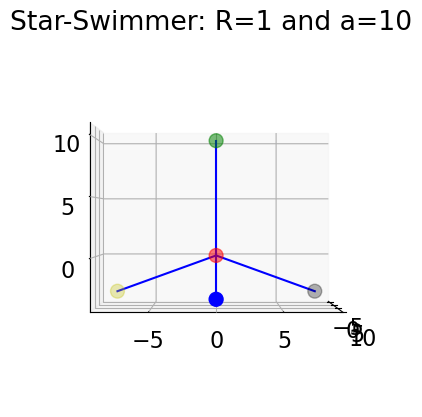

In [65]:
ax = visualize(r0)
plt.title(f"Star-Swimmer: R={R} and a={a}")
plt.savefig("1_1.png")

In [66]:
saveCoordination(r0,"r0")

## Part1 : Comparing epsilon and changes

In [67]:
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [68]:
data = np.zeros((50,6))
thetas = np.zeros(50)

for i in range(50):
    epsilon = epsilons[i]
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data[i,0:3] = totalDelta
    data[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)
    thetas[i] = np.arccos((1 - np.trace(totalRotation))/2)

In [69]:
Rot

scipy.spatial.transform._rotation.Rotation

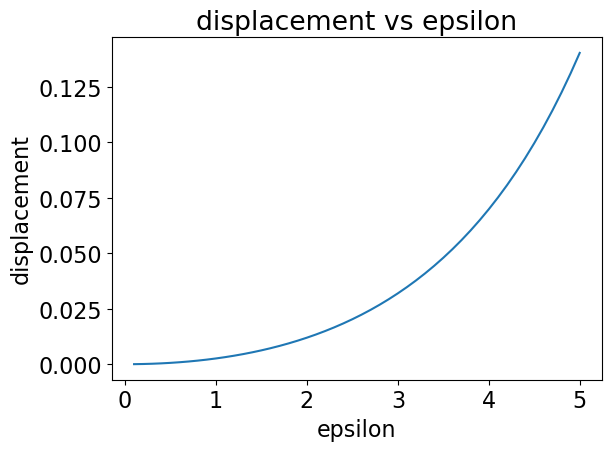

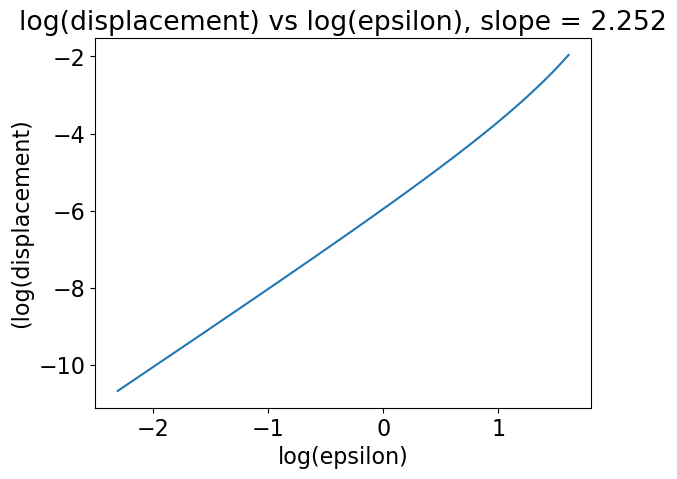

In [70]:

plt.Figure(figsize=(10,10))

plt.subplots(tight_layout=True)

plt.plot(epsilons,np.linalg.norm(data[:,0:3],axis=1))



# slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("epsilon")
plt.ylabel("displacement")
plt.title(f"displacement vs epsilon")





plt.savefig("displacement1.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))

plt.plot(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))



slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("log(epsilon)")
plt.ylabel("(log(displacement)")
plt.title(f"log(displacement) vs log(epsilon), slope = {np.round(slope,3)}")





plt.savefig("log_displacement1.png", bbox_inches="tight")
plt.show()




In [71]:
from numpy import log

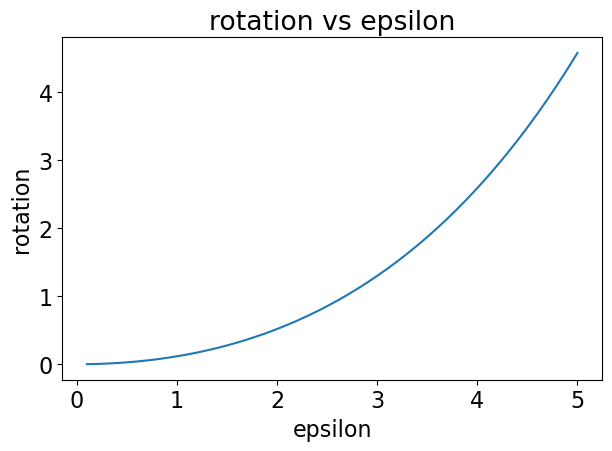

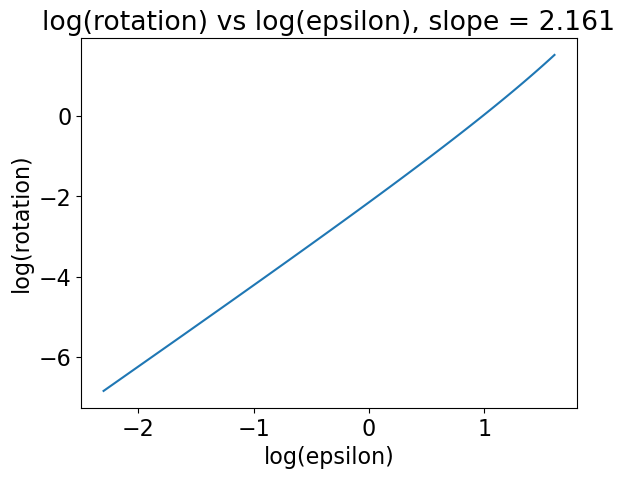

In [72]:
plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(epsilons,180*(np.pi - thetas)/np.pi)




plt.xlabel("epsilon")
plt.ylabel("rotation")
plt.title(f"rotation vs epsilon")




plt.savefig("degree.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))

plt.plot(log(epsilons),log(180*(np.pi - thetas)/np.pi))



slope  = scipy.stats.linregress(np.log(epsilons),np.log(180*(np.pi - thetas)/np.pi))[0]

plt.xlabel("log(epsilon)")
plt.ylabel("log(rotation)")
plt.title(f"log(rotation) vs log(epsilon), slope = {np.round(slope,3)}")




plt.savefig("log_degree.png", bbox_inches="tight")
plt.show()

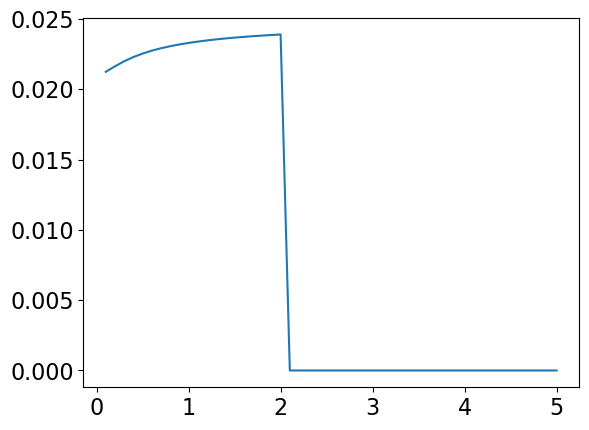

In [73]:
plt.Figure(figsize=(10,10))

plt.plot(epsilons,np.where(thetas2 >= np.pi/2,np.pi - thetas2 , thetas2))


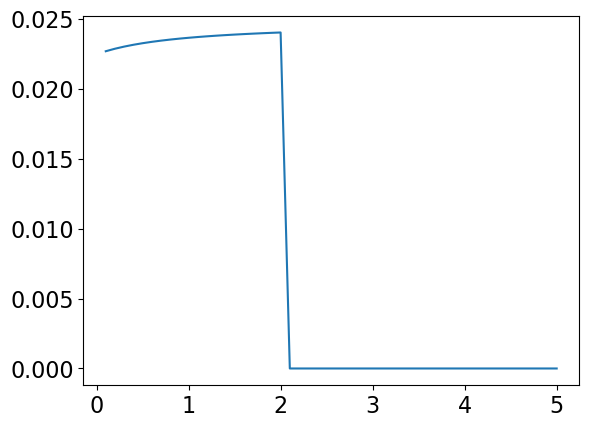

In [74]:
plt.Figure(figsize=(10,10))

plt.plot(epsilons,np.where(thetas3 >= np.pi/2,np.pi - thetas3 , thetas3))


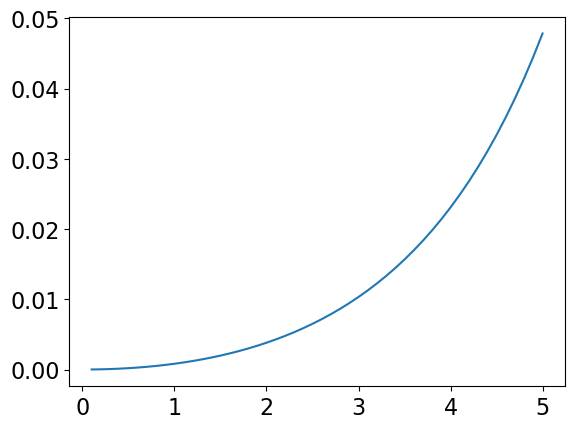

In [75]:
plt.Figure(figsize=(10,10))

plt.plot(epsilons,np.abs(data[:,1]))

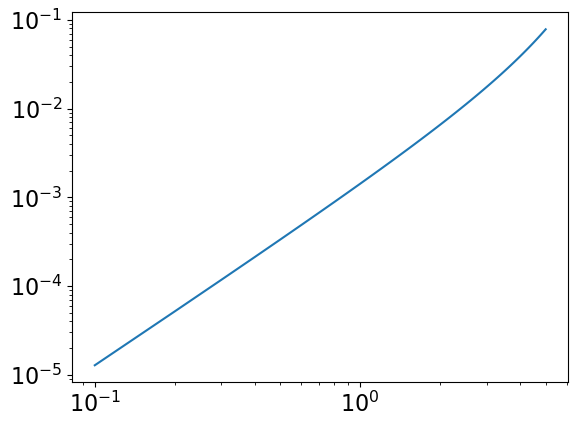

In [76]:
plt.loglog(epsilons,np.abs(data[:,0]))

In [77]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,0])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,1])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,2])))
print(slope)

2.2566607069210125
2.2711108478851907
2.245650916036956


In [78]:
np.arccos((1 - np.trace(totalRotation))/2)

3.0616628411363944

In [79]:
data[:,0:3].shape

(50, 3)

In [80]:
np.exp(-5.8560608680015225)

0.0028624972580132977

In [81]:
scipy.stats.linregress(np.log(epsilons[:]),np.log(np.linalg.norm(data[:,0:3],axis=1)))

LinregressResult(slope=2.2516895777742545, intercept=-5.8560608680015225, rvalue=0.9978424207587537, pvalue=1.9437022928290782e-58, stderr=0.021384048399288674, intercept_stderr=0.023615980870729587)

In [82]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

2.2566607069210125
2.2711108478851907
2.245650916036956
2.1563186137023096
2.1638633609305296
2.152755394088169


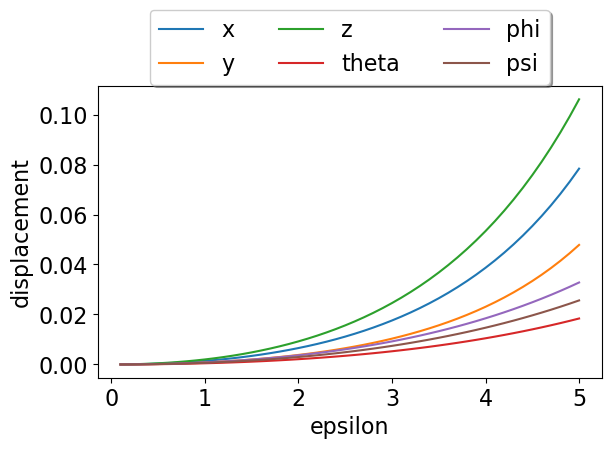

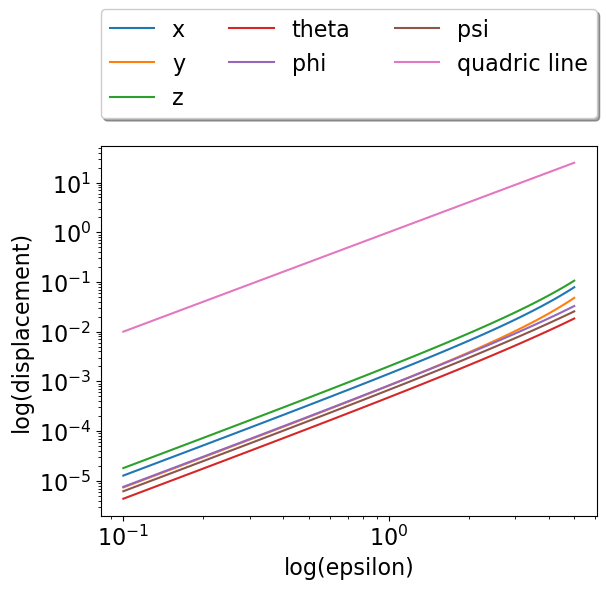

In [83]:


slopes = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,i])))
    slopes.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
#plt.title("change in position and orientation vs epsilon for R=1 and a=10")
plt.xlabel("epsilon")
plt.ylabel("displacement")
for i in range(3):
    plt.plot(epsilons,np.abs(data[:,i]))

for i in range(3,6):
    plt.plot(epsilons,np.abs(0.01*data[:,i]))

plt.legend(["x","y","z","theta","phi","psi"],loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)

plt.savefig("1-2.png", bbox_inches="tight")
plt.show()


plt.Figure(figsize=(10,10))
#plt.title("log of change in position and orientation vs  log of epsilon for R=1 and a=10")
plt.xlabel("log(epsilon)")
plt.ylabel("log(displacement)")
for i in range(3):
    plt.loglog(epsilons,np.abs(data[:,i]))

for i in range(3,6):
    plt.loglog(epsilons,np.abs(0.01*data[:,i]))

plt.loglog(epsilons,epsilons**2)

#plt.legend([f"x,slope={np.round(slopes[0],2)}",f"y,slope={np.round(slopes[1],2)}",f"z,slope={np.round(slopes[2],2)}",f"theta,slope={np.round(slopes[3],2)}",f"phi,slope={np.round(slopes[4],2)}",f"psi,slope={np.round(slopes[5],2)}","quadric line"])
plt.legend(["x","y","z","theta","phi","psi","quadric line"],loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)




plt.savefig("1-3.png", bbox_inches="tight")
plt.show()





In [84]:
As = np.linspace(5,25,20)*R

In [85]:
Rs = np.linspace(1,3,20)

In [86]:
data2 = np.zeros((20,6))
thetas2 = np.zeros(50)
for i in range(20):

    a = As[i]
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data2[i,0:3] = totalDelta
    data2[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)
    thetas2[i] = np.arccos((1 - np.trace(totalRotation))/2)

In [87]:
thetas2.shape,As.shape

((50,), (20,))

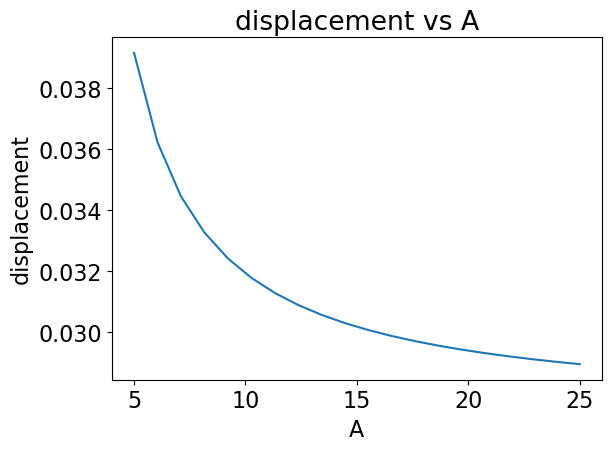

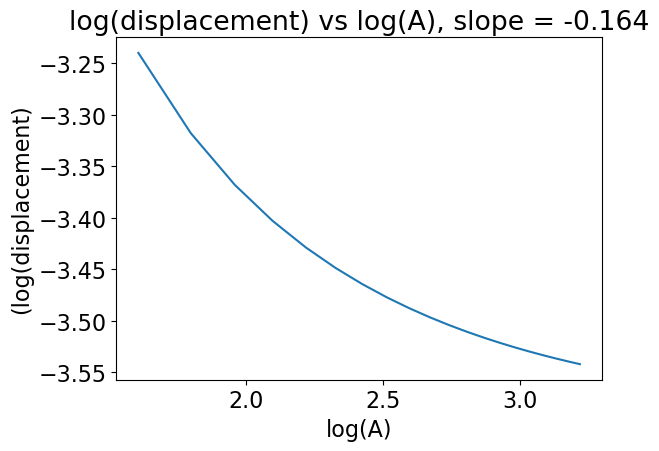

In [88]:


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))



# slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("A")
plt.ylabel("displacement")
plt.title(f"displacement vs A")





plt.savefig("displacement2.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

plt.plot(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))



slope  = scipy.stats.linregress(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))[0]

plt.xlabel("log(A)")
plt.ylabel("(log(displacement)")
plt.title(f"log(displacement) vs log(A), slope = {np.round(slope,3)}")





plt.savefig("log_displacement2.png", bbox_inches="tight")
plt.show()





# plt.Figure(figsize=(10,10))

# plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))

# plt.savefig("displacement2.png")

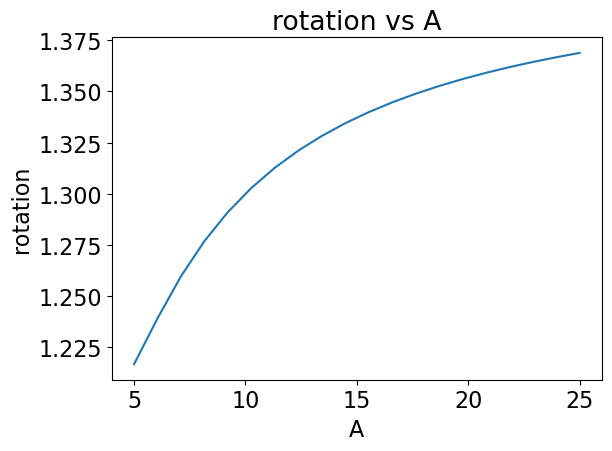

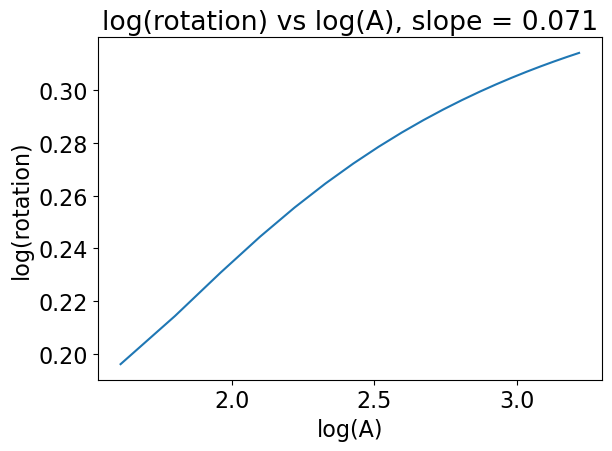

In [89]:
plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(As,180*(np.pi - thetas2[:20])/np.pi)




plt.xlabel("A")
plt.ylabel("rotation")
plt.title(f"rotation vs A")




plt.savefig("degree2.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

plt.plot(log(As),log(180*(np.pi - thetas2[:20])/np.pi))



slope  = scipy.stats.linregress(np.log(As),np.log(180*(np.pi - thetas2[:20])/np.pi))[0]

plt.xlabel("log(A)")
plt.ylabel("log(rotation)")
plt.title(f"log(rotation) vs log(A), slope = {np.round(slope,3)}")




plt.savefig("log_degree2.png", bbox_inches="tight")
plt.show()

-0.16659725329922934
-0.16180152675140125
-0.16294937419612868
0.07081448339547222
0.071383717137344
0.07046730196010045


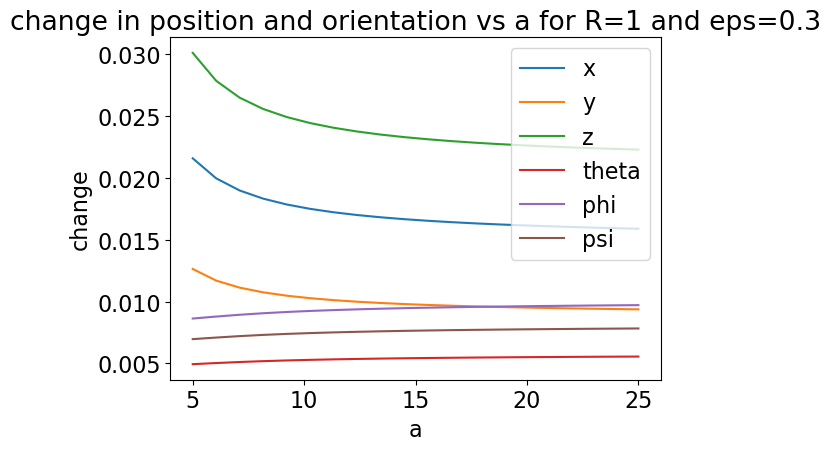

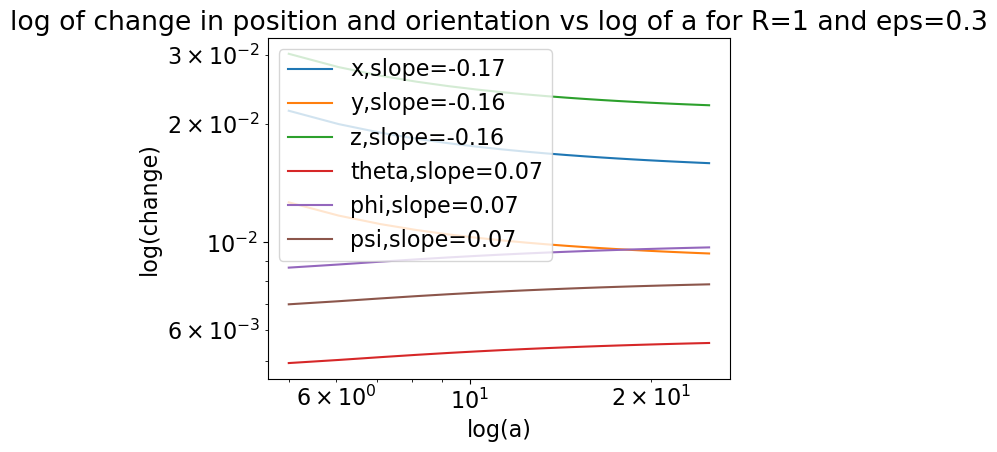

In [90]:
slopes2 = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(As[:]),np.log(np.abs(data2[:,i])))
    slopes2.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

plt.title("change in position and orientation vs a for R=1 and eps=0.3")
plt.xlabel("a")
plt.ylabel("change")
for i in range(3):
    plt.plot(As,np.abs(data2[:,i]))


for i in range(3,6):
    plt.plot(As,np.abs(0.01*data2[:,i]))

plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-4.png", bbox_inches="tight")
plt.show()


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

plt.title("log of change in position and orientation vs log of a for R=1 and eps=0.3")
plt.xlabel("log(a)")
plt.ylabel("log(change)")
for i in range(3):
    plt.loglog(As,np.abs(data2[:,i]))

for i in range(3,6):
    plt.loglog(As,0.01*np.abs(data2[:,i]))

plt.legend([f"x,slope={np.round(slopes2[0],2)}",f"y,slope={np.round(slopes2[1],2)}",f"z,slope={np.round(slopes2[2],2)}",f"theta,slope={np.round(slopes2[3],2)}",f"phi,slope={np.round(slopes2[4],2)}",f"psi,slope={np.round(slopes2[5],2)}"])
plt.savefig("1-5.png", bbox_inches="tight")
plt.show()


In [91]:
100 /16

6.25

In [92]:
data3 = np.zeros((20,6))
thetas3 = np.zeros(50)
for i in range(20):
    r = Rs[i]

    a = 10*r
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data3[i,0:3] = totalDelta
    data3[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)
    thetas3[i] = np.arccos((1 - np.trace(totalRotation))/2)

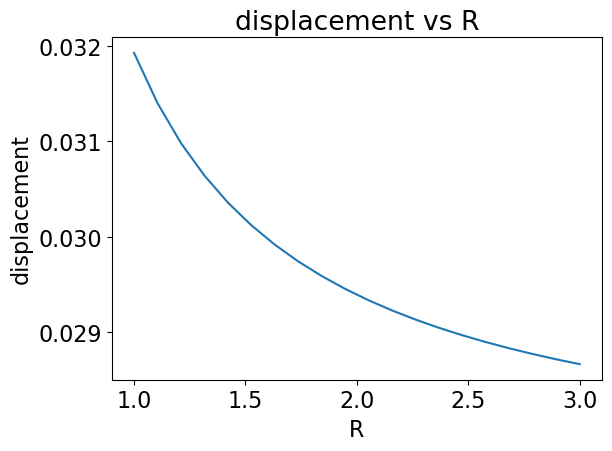

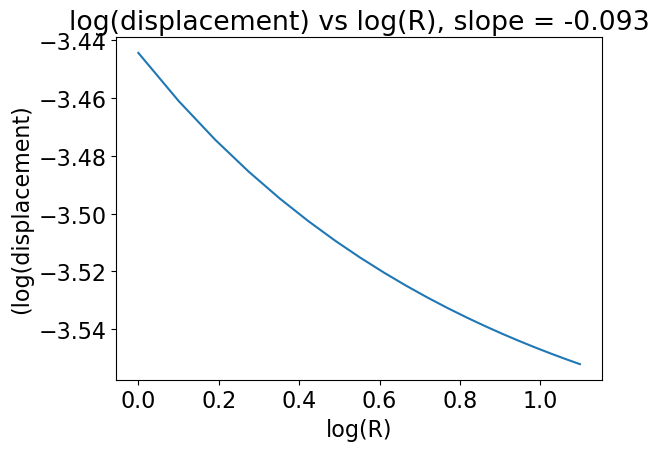

In [93]:


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(Rs,np.linalg.norm(data3[:,0:3],axis=1))



# slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("R")
plt.ylabel("displacement")
plt.title(f"displacement vs R")





plt.savefig("displacement3.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(np.log(Rs),np.log(np.linalg.norm(data3[:,0:3],axis=1)))



slope  = scipy.stats.linregress(np.log(Rs),np.log(np.linalg.norm(data3[:,0:3],axis=1)))[0]

plt.xlabel("log(R)")
plt.ylabel("(log(displacement)")
plt.title(f"log(displacement) vs log(R), slope = {np.round(slope,3)}")





plt.savefig("log_displacement3.png", bbox_inches="tight")
plt.show()





# plt.Figure(figsize=(10,10))

# plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))

# plt.savefig("displacement2.png")

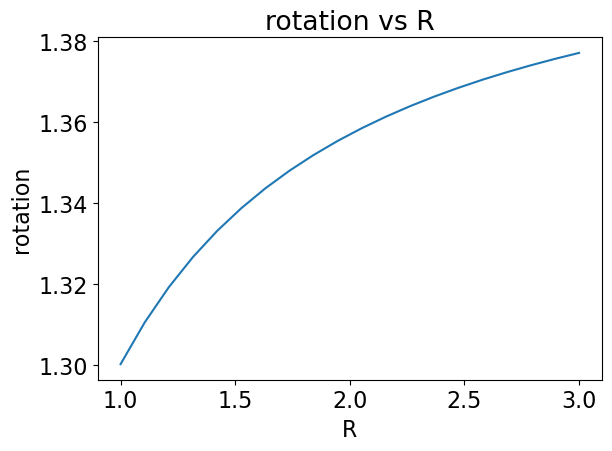

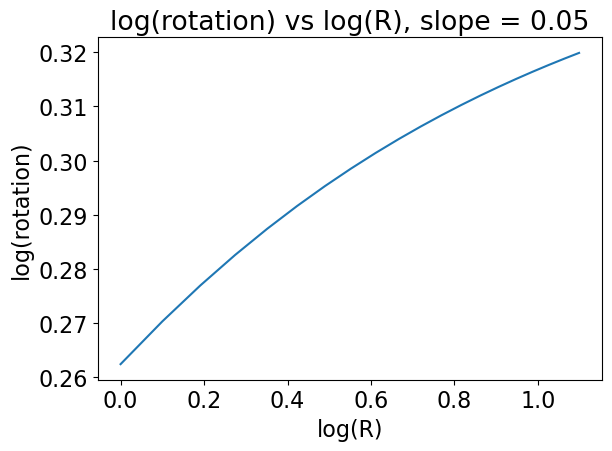

In [94]:
plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(Rs,180*(np.pi - thetas3[:20])/np.pi)




plt.xlabel("R")
plt.ylabel("rotation")
plt.title(f"rotation vs R")




plt.savefig("degree3.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(log(Rs),log(180*(np.pi - thetas3[:20])/np.pi))



slope  = scipy.stats.linregress(np.log(Rs),np.log(180*(np.pi - thetas3[:20])/np.pi))[0]

plt.xlabel("log(R)")
plt.ylabel("log(rotation)")
plt.title(f"log(rotation) vs log(R), slope = {np.round(slope,3)}")




plt.savefig("log_degree3.png", bbox_inches="tight")
plt.show()

-0.09654065902221588
-0.09127035284742445
-0.09082726057800174
0.05010810489042857
0.050524465962579694
0.04985718833806309


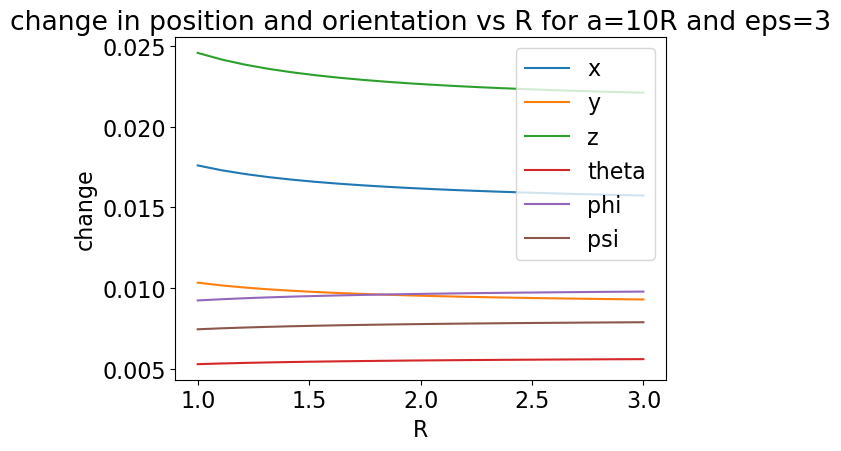

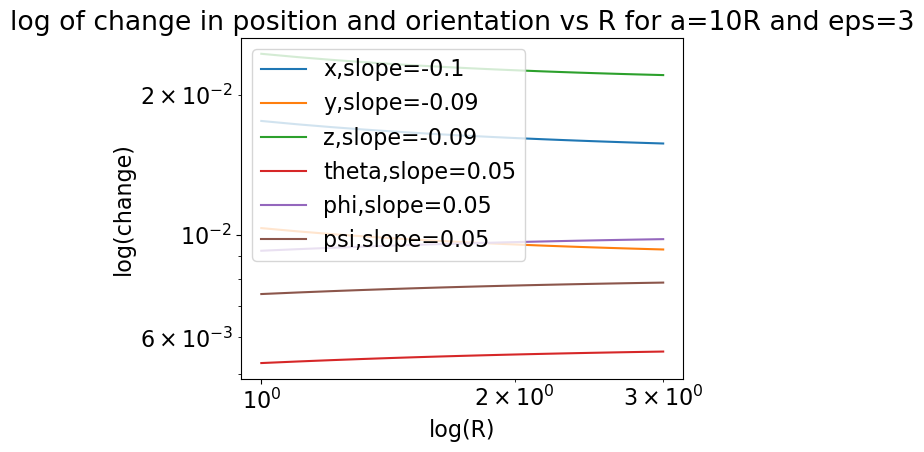

In [95]:
slopes3 = []  

for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(Rs[:]),np.log(np.abs(data3[:,i])))
    slopes3.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.title("change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("R")
plt.ylabel("change")
for i in range(3):
    plt.plot(Rs,np.abs(data3[:,i]))
for i in range(3,6):
    plt.plot(Rs,0.01*np.abs(data3[:,i]))
plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-6.png", bbox_inches="tight")
plt.show()


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.title("log of change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("log(R)")
plt.ylabel("log(change)")
for i in range(3):
    plt.loglog(Rs,np.abs(data3[:,i]))
for i in range(3,6):
    plt.loglog(Rs,0.01*np.abs(data3[:,i]))
plt.legend([f"x,slope={np.round(slopes3[0],2)}",f"y,slope={np.round(slopes3[1],2)}",f"z,slope={np.round(slopes3[2],2)}",f"theta,slope={np.round(slopes3[3],2)}",f"phi,slope={np.round(slopes3[4],2)}",f"psi,slope={np.round(slopes3[5],2)}"])
plt.savefig("1-7.png", bbox_inches="tight")
plt.show()


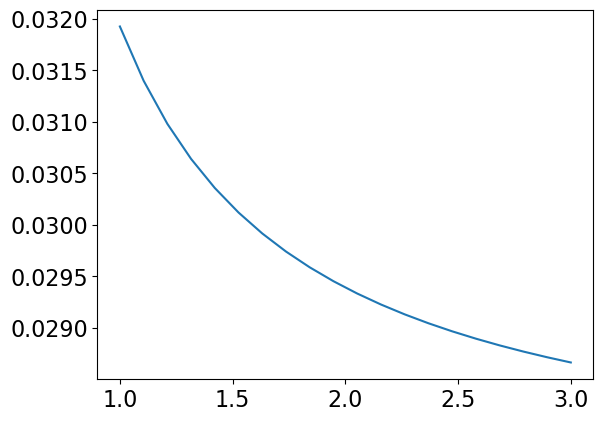

In [82]:

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(Rs,np.linalg.norm(data3[:,0:3],axis=1))

plt.savefig("displacement1.png")

$ \delta r =  0.004 * R^{1} .\epsilon_{partial}^{2.25} . D^{-0.16} $

In [27]:
10 **(0.16) *  0.0028624972580132977

0.004137567380383587